,Absolut,Real %,Benford %,Diff %
AnnualIncome,,,,
1,951,47.86,30.10,17.76
2,0,0.00,17.61,-17.61
3,143,7.20,12.49,-5.30
4,80,4.03,9.69,-5.66
5,224,11.27,7.92,3.36
6,128,6.44,6.69,-0.25
7,160,8.05,5.80,2.25
8,208,10.47,5.12,5.35
9,93,4.68,4.58,0.10


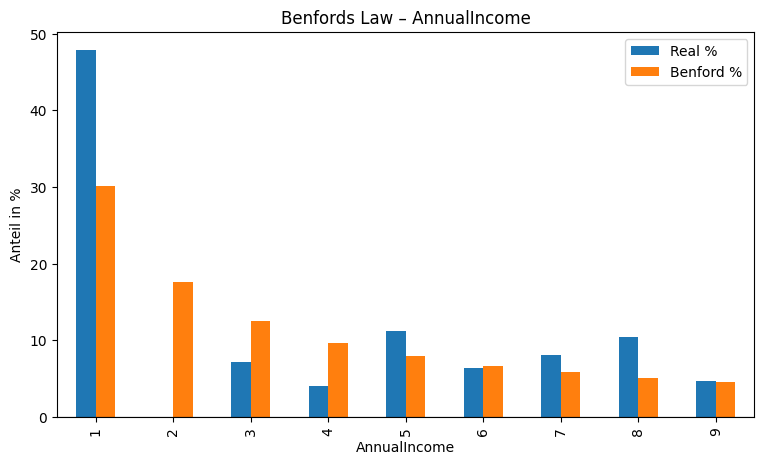

Maximale Abweichung: 17.8%
Betrug verdächtig! (starke Abweichung oder fehlende Ziffern)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("TravelInsurancePrediction.csv")
col = "AnnualIncome"

# Erste Ziffer extrahieren
erste = df[col].astype(str).str[0].astype(int)

# Absolute & relative Häufigkeit (1-9, fehlende → 0)
real = erste.value_counts().reindex(range(1,10), fill_value=0).sort_index()
real_pct = real / len(erste) * 100

# Benford erwartet
benford_pct = np.log10(1 + 1/np.arange(1,10)) * 100

# Tabelle
tabelle = pd.DataFrame({
    "Absolut"    : real,
    "Real %"     : real_pct.round(2),
    "Benford %"  : benford_pct.round(2),
    "Diff %"     : (real_pct - benford_pct).round(2)
}).astype({"Absolut": int})

display(tabelle)

# Diagramm
tabelle[["Real %", "Benford %"]].plot(kind="bar", title=f"Benfords Law – {col}", figsize=(9,5))
plt.ylabel("Anteil in %"); plt.axhline(0, color="k", linewidth=0.8); plt.show()

# Einfacher "Betrug-Check" ohne scipy (nur Daumenregel)
abweichung = abs(tabelle["Diff %"]).max()
print(f"Maximale Abweichung: {abweichung:.1f}%")
if abweichung > 10 or (real == 0).any():
    print("Betrug verdächtig! (starke Abweichung oder fehlende Ziffern)")
else:
    print("Sieht OK aus")

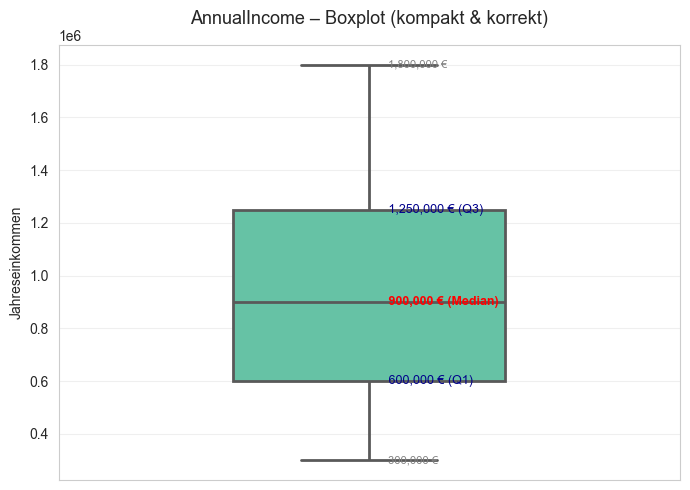

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("TravelInsurancePrediction.csv")
income = df["AnnualIncome"]

# Kennzahlen (wie vorher)
q1     = income.quantile(0.25)
q3     = income.quantile(0.75)
median = income.median()
iqr    = q3 - q1
lower  = income[income >= q1 - 1.5*iqr].min()
upper  = income[income <= q3 + 1.5*iqr].max()

# Die richtige, saubere Methode (kein hue-Trick nötig!)
plt.figure(figsize=(7,5))
sns.boxplot(
    y="AnnualIncome",
    data=df,
    width=0.35,           # schmaler Kasten
    linewidth=2,
    color="#66c2a5",      # schönes Grün (oder jede andere Farbe)
    fliersize=6,
    saturation=1
)

# Beschriftungen direkt an den Linien (klein & dezent)
plt.text(0.02, median, f' {median:,.0f} € (Median)', ha='left', va='center',
         fontsize=9, fontweight='bold', color='red')
plt.text(0.02, q1,     f' {q1:,.0f} € (Q1)', ha='left', va='center', fontsize=9, color='darkblue')
plt.text(0.02, q3,     f' {q3:,.0f} € (Q3)', ha='left', va='center', fontsize=9, color='darkblue')
plt.text(0.02, lower,  f' {lower:,.0f} €', ha='left', va='center', fontsize=8, color='gray')
plt.text(0.02, upper,  f' {upper:,.0f} €', ha='left', va='center', fontsize=8, color='gray')

plt.title("AnnualIncome – Boxplot (kompakt & korrekt)", fontsize=13, pad=15)
plt.ylabel("Jahreseinkommen")
plt.xlim(-0.4, 0.4)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

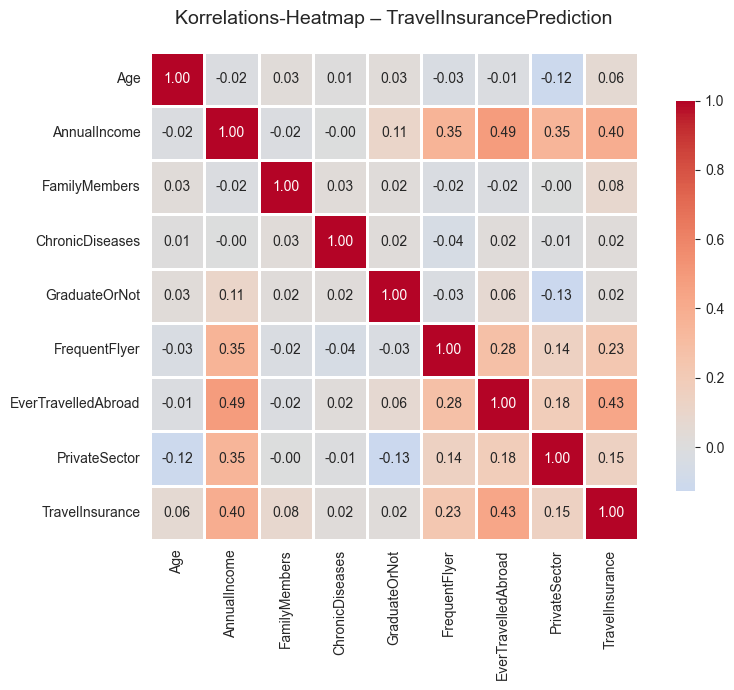

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("TravelInsurancePrediction.csv")

# Kategorische Yes/No in 0/1 umwandeln
df["GraduateOrNot"]      = df["GraduateOrNot"].map({"Yes":1, "No":0})
df["FrequentFlyer"]      = df["FrequentFlyer"].map({"Yes":1, "No":0})
df["EverTravelledAbroad"]= df["EverTravelledAbroad"].map({"Yes":1, "No":0})

# Employment Type: nur 2 Kategorien → auch 0/1
df["PrivateSector"] = (df["Employment Type"] == "Private Sector/Self Employed").astype(int)

# Korrelationsmatrix
corr = df[["Age", "AnnualIncome", "FamilyMembers", "ChronicDiseases",
           "GraduateOrNot", "FrequentFlyer", "EverTravelledAbroad", 
           "PrivateSector", "TravelInsurance"]].corr()

# Heatmap (kompakt & schön)
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f",
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title("Korrelations-Heatmap – TravelInsurancePrediction", fontsize=14, pad=20)
plt.tight_layout()
plt.show()